In [94]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import warnings
import numpy as np
import statsmodels.api as sm
from scipy.stats import f_oneway




In [93]:
# Ignore specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Read the data into a DataFrame
file_path = "BYAGE.TXT"
df = pd.read_csv(file_path, delimiter='|', low_memory=False)
df.head() 

# Clean data if needed (handling missing values, etc.)

# Convert rate column to numeric if needed
# df['RATE'] = pd.to_numeric(df['RATE'], errors='coerce')

# Group data by age group and cancer type
# group = df.groupby(['AGE', 'EVENT_TYPE', 'SITE'])['RATE'].mean().reset_index()
#print(grouped)


,AGE,CI_LOWER,CI_UPPER,COUNT,EVENT_TYPE,POPULATION,RACE,RATE,SEX,SITE,YEAR
0,1-4,2.2,2.9,191,Mortality,7493614,All Races,2.5,Female,All Cancer Sites Combined,1999
1,1-4,17.2,19.1,1339,Incidence,7394181,All Races,18.1,Female,All Cancer Sites Combined,1999
2,1-4,0.6,1.0,57,Mortality,7493614,All Races,0.8,Female,Brain and Other Nervous System,1999
3,1-4,3.2,4.1,270,Incidence,7394181,All Races,3.7,Female,Brain and Other Nervous System,1999
4,1-4,~,~,~,Mortality,7493614,All Races,~,Female,Cervix,1999


In [51]:
#Summary statistics
summary = df.groupby('AGE')['RATE'].agg(['mean', 'median', lambda x: x.max() - x.min()]).reset_index()
summary.columns = ['AGE', 'Mean', 'Median', 'Range']
print(summary)

      AGE        Mean  Median   Range
0     1-4    5.626854     2.3    32.7
1   10-14    2.871596     1.3    20.9
2   15-19    3.672290     1.9    31.1
3   20-24    4.220970     1.7    46.3
4   25-29    5.624903     1.9    83.4
5   30-34    7.886305     2.4   147.8
6   35-39   11.252311     2.9   260.9
7   40-44   17.306588     3.9   375.0
8   45-49   25.728946     5.9   506.0
9     5-9    3.152667     1.6    23.6
10  50-54   38.606877     9.6   797.8
11  55-59   56.790514    14.4  1437.5
12  60-64   81.397754    20.5  2142.2
13  65-69  112.553152    28.4  2917.9
14  70-74  138.536620    35.8  3391.1
15  75-79  163.782541    44.8  3620.7
16  80-84  185.556243    51.2  3557.0
17    85+  200.369739    53.2  3585.6
18     <1    8.543201     3.8    40.6


/var/folders/wx/5x75wv8s7yqb6x7sd0h55lw00000gn/T/ipykernel_5965/3913343008.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', num_unique_cancer_types)


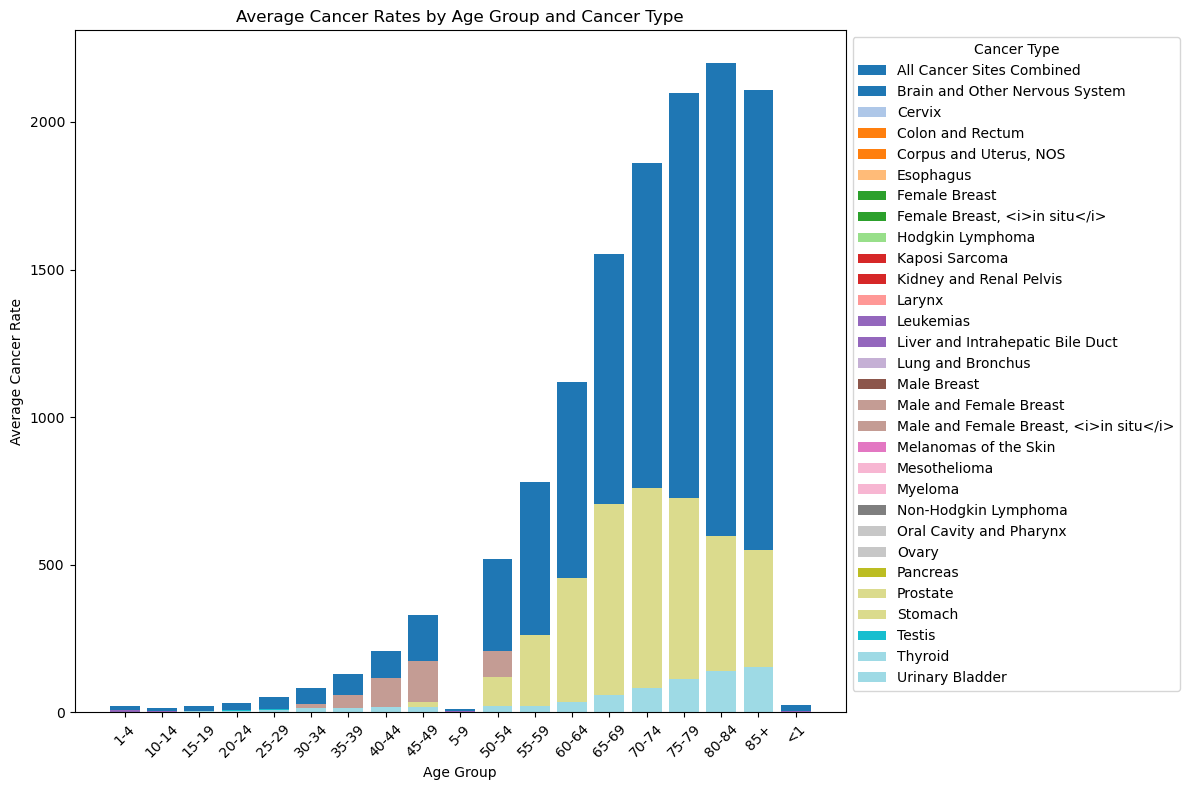

In [52]:
# Define the number of unique cancer types
unique_cancer_types = grouped['SITE'].unique()
num_unique_cancer_types = 30  

# Create a dictionary to assign colors to each unique cancer type
colors = plt.cm.get_cmap('tab20', num_unique_cancer_types)

# Example: Bar plot for average cancer rates by age group and cancer type
plt.figure(figsize=(12, 8))
for i, (cancer_type, data) in enumerate(grouped.groupby('SITE')):
    plt.bar(data['AGE'], data['RATE'], label=cancer_type, color=colors(i))

plt.xlabel('Age Group')
plt.ylabel('Average Cancer Rate')
plt.title('Average Cancer Rates by Age Group and Cancer Type')
plt.xticks(rotation=45)
plt.legend(title='Cancer Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [107]:
incidence_df = df[(df['SITE'] == 'All Cancer Sites Combined') & (df['RACE'] == 'All Races') & (df['SEX'] == 'Male and Female')].copy()
incidence_rate_df = incidence_df[(incidence_df['EVENT_TYPE'] == 'Incidence') & (incidence_df['YEAR'] != '2016-2020')]
incidence_rate_df = incidence_rate_df.astype({"COUNT": int, "POPULATION": int})
#incidence_rate_df.to_csv("incidence_rate_df.csv") 
incidence_rate_df

,AGE,CI_LOWER,CI_UPPER,COUNT,EVENT_TYPE,POPULATION,RACE,RATE,SEX,SITE,YEAR
1806,1-4,19.1,20.5,2994,Incidence,15136428,All Races,19.8,Male and Female,All Cancer Sites Combined,1999
1862,10-14,12.0,12.9,2479,Incidence,19935660,All Races,12.4,Male and Female,All Cancer Sites Combined,1999
1918,15-19,19.1,20.3,3894,Incidence,19785979,All Races,19.7,Male and Female,All Cancer Sites Combined,1999
1974,20-24,31.9,33.6,5997,Incidence,18328417,All Races,32.7,Male and Female,All Cancer Sites Combined,1999
2030,25-29,51.0,53.0,10047,Incidence,19333894,All Races,52.0,Male and Female,All Cancer Sites Combined,1999
...,...,...,...,...,...,...,...,...,...,...,...
381298,70-74,1722.7,1736.3,246238,Incidence,14237499,All Races,1729.5,Male and Female,All Cancer Sites Combined,2020
381354,75-79,1957.4,1975.0,190559,Incidence,9691829,All Races,1966.2,Male and Female,All Cancer Sites Combined,2020
381410,80-84,2023.1,2045.5,127717,Incidence,6278216,All Races,2034.3,Male and Female,All Cancer Sites Combined,2020
381466,85+,1789.2,1809.9,116614,Incidence,6480315,All Races,1799.5,Male and Female,All Cancer Sites Combined,2020


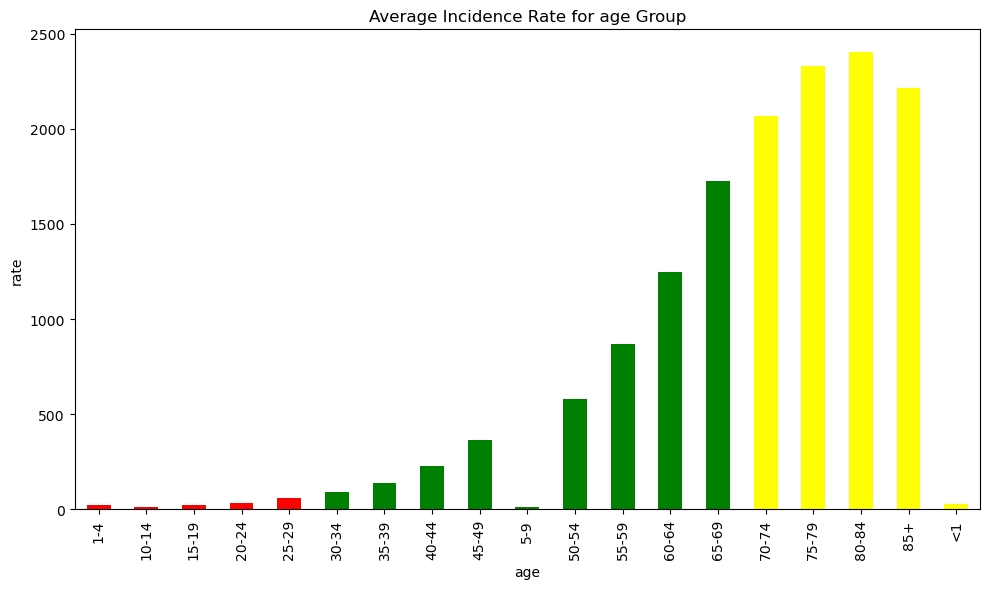

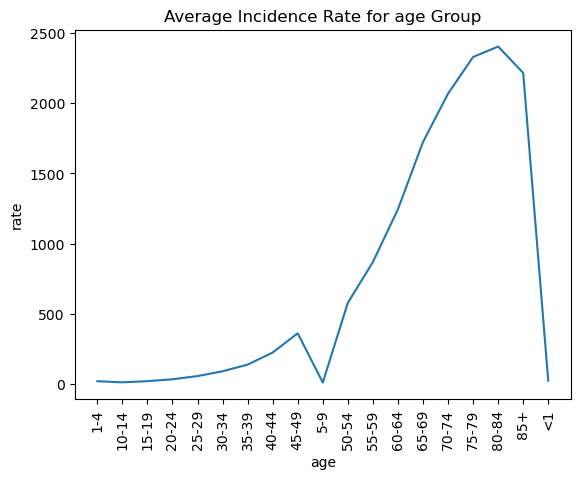

In [119]:
# barplot for age group incidence
avg_incidence_count = incidence_rate_df.groupby(['AGE'])['COUNT'].mean()
avg_incidence_popln = incidence_rate_df.groupby(['AGE'])['POPULATION'].mean()
avg_incidence_rate = (avg_incidence_count/avg_incidence_popln)*100000

#Create states average incidence data frame
states_avg_incidence_rate = pd.DataFrame({
    "Average incidence" : avg_incidence_count,
    "Average Population" : avg_incidence_popln,
    "Average incidence/100,000 ppl" : avg_incidence_rate
})
#plot bar 
plt.figure(figsize=(10, 6))

#Define colors for top 5, bottom 5, and middle bars
top_color = 'red'
bottom_color = 'yellow'
middle_color = 'green'
colors = [top_color] * 5 + [middle_color] * (len(states_avg_incidence_rate) - 10) + [bottom_color] * 5
states_avg_incidence_rate['Average incidence/100,000 ppl'].plot(kind='bar', color=colors)
plt.xlabel('age')
plt.ylabel('rate')
plt.title('Average Incidence Rate for age Group')
plt.xticks(rotation=90)  
plt.tight_layout()

# Save the figure
plt.savefig("cancer incidence bar plot.png")
plt.show()

# Line plot for incidence age group

plt.plot(states_avg_incidence_rate.index, states_avg_incidence_rate["Average incidence/100,000 ppl"])
plt.xlabel('age')
plt.ylabel('rate')
plt.title('Average Incidence Rate for age Group')
plt.xticks(rotation=90)
# Save the figure
plt.savefig("cancer incidence line plot.png")
plt.show()




In [120]:
# Mortality
mortality_df = df[(df['SITE'] == 'All Cancer Sites Combined') & (df['RACE'] == 'All Races') & (df['SEX'] == 'Male and Female')].copy()
mortality_rate_df = mortality_df[(mortality_df['EVENT_TYPE'] == 'Mortality') & (mortality_df['YEAR'] != '2016-2020')]
mortality_rate_df = mortality_rate_df.astype({"COUNT": int, "POPULATION": int})
mortality_rate_df.to_csv("incidence_rate_df.csv") 
mortality_rate_df

,AGE,CI_LOWER,CI_UPPER,COUNT,EVENT_TYPE,POPULATION,RACE,RATE,SEX,SITE,YEAR
1805,1-4,2.5,3.0,418,Mortality,15339782,All Races,2.7,Male and Female,All Cancer Sites Combined,1999
1861,10-14,2.3,2.7,503,Mortality,20213364,All Races,2.5,Male and Female,All Cancer Sites Combined,1999
1917,15-19,3.4,4.0,745,Mortality,20084602,All Races,3.7,Male and Female,All Cancer Sites Combined,1999
1973,20-24,4.9,5.6,979,Mortality,18591429,All Races,5.3,Male and Female,All Cancer Sites Combined,1999
2029,25-29,6.9,7.7,1429,Mortality,19575057,All Races,7.3,Male and Female,All Cancer Sites Combined,1999
...,...,...,...,...,...,...,...,...,...,...,...
381297,70-74,633.1,641.3,93513,Mortality,14675731,All Races,637.2,Male and Female,All Cancer Sites Combined,2020
381353,75-79,872.5,884.1,87710,Mortality,9986833,All Races,878.3,Male and Female,All Cancer Sites Combined,2020
381409,80-84,1154.4,1171.1,75166,Mortality,6464714,All Races,1162.7,Male and Female,All Cancer Sites Combined,2020
381465,85+,1528.7,1547.5,102413,Mortality,6658420,All Races,1538.1,Male and Female,All Cancer Sites Combined,2020


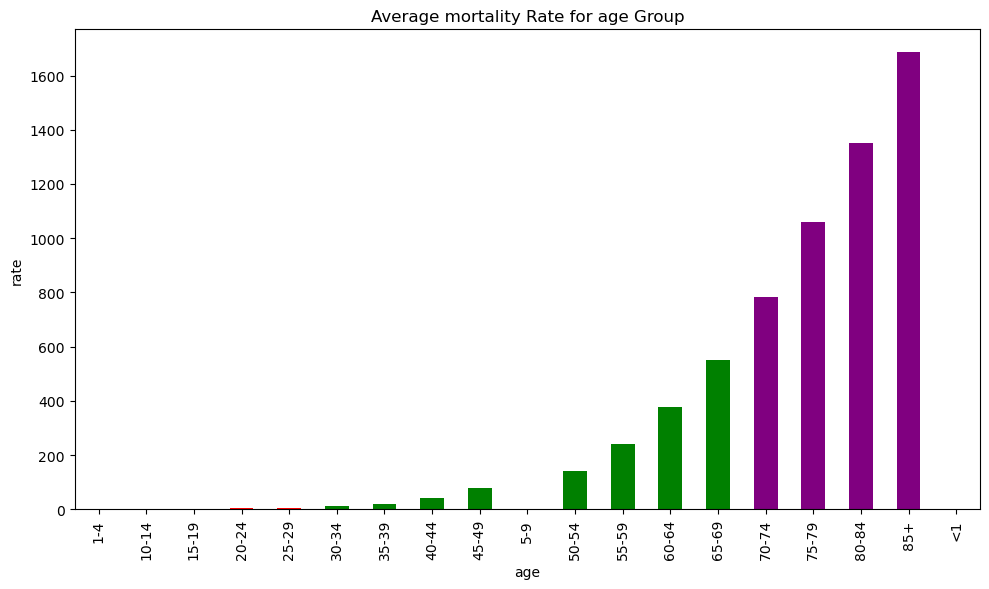

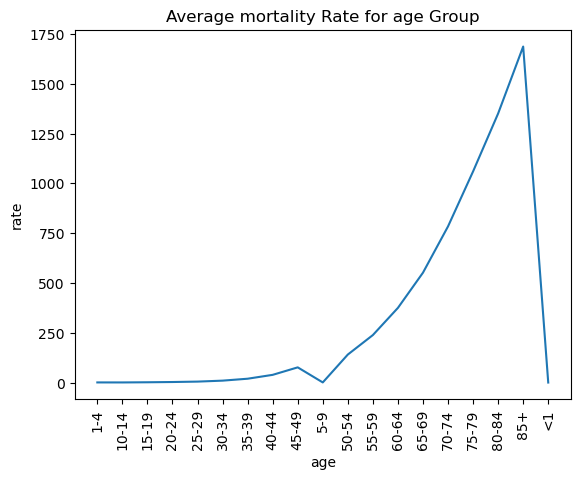

In [122]:
# barplot for mortality 
avg_mortality_count = mortality_rate_df.groupby(['AGE'])['COUNT'].mean()
avg_mortality_popln = mortality_rate_df.groupby(['AGE'])['POPULATION'].mean()
avg_mortality_rate = (avg_mortality_count/avg_mortality_popln)*100000

#Create states average mortality data frame
states_avg_mortality_rate = pd.DataFrame({
    "Average mortality" : avg_mortality_count,
    "Average Population" : avg_mortality_popln,
    "Average mortality/100,000 ppl" : avg_mortality_rate
})
#plot bar 
plt.figure(figsize=(10, 6))

#Define colors for top 5, bottom 5, and middle bars
top_color = 'red'
bottom_color = 'purple'
middle_color = 'green'
colors = [top_color] * 5 + [middle_color] * (len(states_avg_mortality_rate) - 10) + [bottom_color] * 5
states_avg_mortality_rate['Average mortality/100,000 ppl'].plot(kind='bar', color=colors)
plt.xlabel('age')
plt.ylabel('rate')
plt.title('Average mortality Rate for age Group')
plt.xticks(rotation=90)  
plt.tight_layout()

# Save the figure
plt.savefig("cancer mortality bar plot.png")
plt.show()

# Line plot for mortality age group

plt.plot(states_avg_mortality_rate.index, states_avg_mortality_rate["Average mortality/100,000 ppl"])
plt.xlabel('age')
plt.ylabel('rate')
plt.title('Average mortality Rate for age Group')
plt.xticks(rotation=90)
# Save the figure
plt.savefig("cancer mortality line plot.png")
plt.show()


